# Confirm Annotation

In [1]:
%load_ext autoreload
%matplotlib inline

In [91]:
%autoreload
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils import get_neocr_dicts
from tqdm import tqdm

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [92]:
images_path = 'neocr_dataset/Images/users/pixtract/dataset/'
annotations_path = 'neocr_dataset/Annotations/users/pixtract/dataset/'

print('Loading Data...')
dataset_dicts = get_neocr_dicts(images_path, annotations_path)

100%|██████████| 659/659 [01:05<00:00, 10.01it/s]


In [93]:
save_dir = 'annotated_images/'
os.makedirs(save_dir, exist_ok=True)

print('Making Annotated Images...')
for index, d in tqdm(enumerate(dataset_dicts), total=len(dataset_dicts)):
    img = cv2.imread(d["file_name"])
    img_filename = os.path.basename(d["file_name"])

    for a in d['annotations']:
        xmin, ymin, xmax, ymax = a['bbox']
        img = cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(255,255,0),2)

    cv2.imwrite(f"{save_dir}/ann_{img_filename}", img)

100%|██████████| 659/659 [02:52<00:00,  3.81it/s]


`make_annotated_images.py`にてモジュール化した。

# Annotation Error
回転すれば正しくアノテーションできそうなやつと全く上手くできなさそうなやつがある。\
また、うまくアノテーションできていないやつは同じ写真が多い。

93519188,
105215353,
106907413,
140286525,
209596332,
230664808,
247632908,
328242995,
354001143,
377854318,
389227879,
407877135,
416780208,
423115341,
433780658,
436020480,
460235797,
491350693,
494481392,
528495588,
529587527,
539233740,
575687816,
586185068,
596597607,
616541433,
630994834,
642970880,
657467816,
692711963,
706795565,
708094209,
721270757,
833382544,
926016157,

あまり良くなさそう
291305860,
430641252,

色がわかりにくい？アノテーションされてなさそう。
496668027,
507940877,
662544171,



# Using Matplotlib

In [94]:
def display_image(cv2_img):
    plt.figure(figsize=(15,8))
    plt.imshow(cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

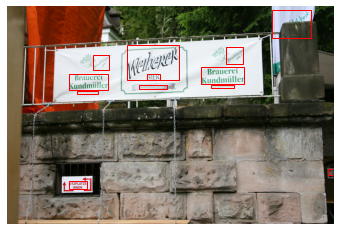

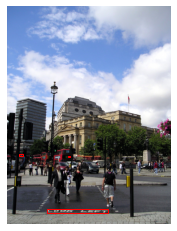

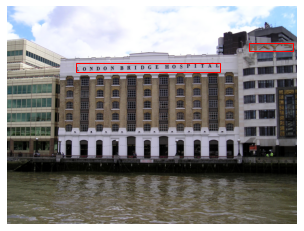

In [97]:
import random

for d in random.sample(dataset_dicts, 3): 
    img = cv2.imread(d["file_name"])
#     img_filename = os.path.basename(d["file_name"])
#     print(img_filename)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    for a in d['annotations']:
        xmin, ymin, xmax, ymax = a['bbox']
        plt.gca().add_patch(plt.Rectangle(xy=[xmin,ymin], width=xmax-xmin, height=ymax-ymin, fill=False, edgecolor='red'))

    plt.axis('off')
    plt.show()

# Using Detectron2

In [ ]:

predictor = DefaultPredictor(cfg)

In [13]:
cfg = get_cfg()

# Use CPU on Mac
cfg.MODEL.DEVICE = 'cpu'

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
# outputs = predictor(im)

ResNet.make_stage(first_stride=) is deprecated!  Use 'stride_per_block' or 'stride' instead.


In [15]:
# from detectron2.utils.visualizer import ColorMode
import random

for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    
#     v = Visualizer(im[:, :, ::-1],
#                    metadata=neocr_metadata, 
#                    scale=0.5, 
#                 #    instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
#     )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    display_image(out.get_image()[:, :, ::-1])

IndexError: tuple index out of range

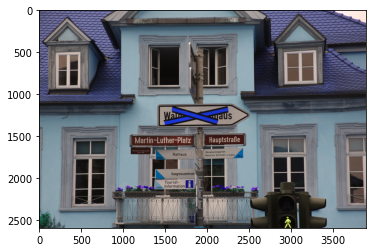

In [17]:
plt.imshow(cv2.imread(d["file_name"]))

In [19]:
cfg.DATASETS.TRAIN

()